In [15]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [16]:
def avg_time(file_path: str) -> float:
    with open(file_path, "r") as f:
        times = [float(time) for time in f.readlines()]
        avg = sum(times) / len(times)
    return avg

In [17]:
epoch_avg = avg_time("../second_test/epoch_times.txt")

In [18]:
train_avg = avg_time("../second_test/train_times.txt")

In [19]:
test_avg = avg_time("../second_test/test_times.txt")

# Unoptimized Benchmark

I ran the original (unoptimized) code for 10 hours and was able to get through 145 epochs (passes through the entire dataset).

As expected, the model training process took the vast majority of the time! This is where we will benefit most from a speedup:

Average epoch time: 245.7799807252555


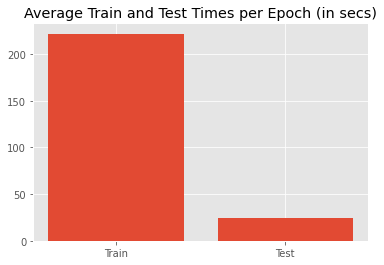

In [24]:
plt.bar(["Train", "Test"], [train_avg, test_avg])
plt.title("Average Train and Test Times per Epoch (in secs)")
print(f"Average epoch time: {epoch_avg}")

# Results after Initial Optimizations

I refactored the base PyTorch code into Pytorch-lightning compatible code. It took 10 hours and 34 minutes to get through all 200 epochs, **which already constitutes a 23% speedup!** Lightning produces beautiful profiler reports; this job's report can be found in the slurm file in the **third_test** directory.